# More of Gaussian Likelihood and $\chi^{2}$.

In [1]:
#import main libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#Making a time and data set with quadratic behaviour
y = np.square(np.linspace(-10,10,100))
t = np.linspace(-10,10,100)

<class 'numpy.ndarray'>


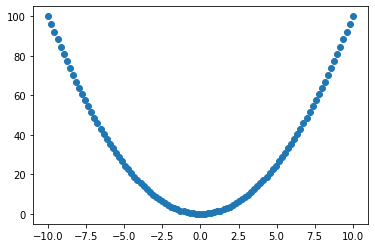

In [23]:
print(type(y))
#Ploting
plt.plot(t,y,'o')

In [29]:
#Creating white noise to the data set with numpy.random.normal
noise = np.random.normal(loc=0, scale=5, size=100)
#Adding that noise to our data set
signal = y + noise

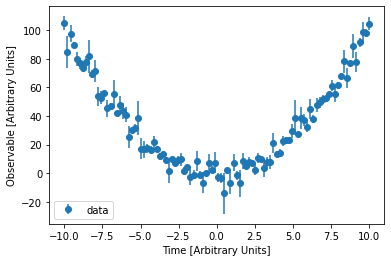

In [30]:
#Plotting the noisy data
plt.errorbar(t, signal, yerr = noise, label = 'data', fmt = 'o')
plt.xlabel('Time [Arbitrary Units]')
plt.ylabel('Observable [Arbitrary Units]')
plt.legend()
plt.show()

In [31]:
#Defining a parabolic function
def parab(t,p):
    a = p[0]
    b = p[1]
    c = p[2]
    return a*t**2 + b*t + c

In [32]:
#Defining a function for the logarithmic Gaussian likelihood
def negalolik(p,t,y,noise):
    f = parab(t,p)
    chidos = (y - f)**2/noise**2
    lognorm = np.log(2 * np.pi * noise**2)
    total = lognorm + chidos
    loglike = -0.5*np.sum(total)
#Since we are trying to maximize the gaussian likelihood, we have to minimize its negative.     
    return -loglike

In [34]:
#Maximizing the likelihood.
lik_model = minimize(negalolik,x0=[0,0,0], args=(t,y,noise))

In [35]:
print(lik_model)

      fun: 212.11967278974495
 hess_inv: array([[ 2.31571541e-05, -1.15893529e-04, -5.11561494e-04],
       [-1.15893529e-04,  8.19396435e-04,  3.05313294e-03],
       [-5.11561494e-04,  3.05313294e-03,  1.41234640e-02]])
      jac: array([1.90734863e-06, 1.90734863e-06, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 8
     njev: 11
   status: 0
  success: True
        x: array([9.99999969e-01, 1.42643371e-07, 6.54444351e-07])


In [36]:
print("The optimized values of our parameters are:","a =", lik_model.x[0],", b =",lik_model.x[1], "and c =", lik_model.x[2])

The optimized values of our parameters are: a = 0.9999999688098032 , b = 1.4264337106281915e-07 and c = 6.544443505177967e-07


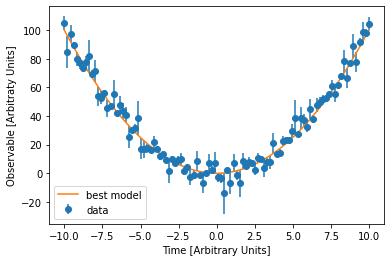

In [38]:
#Now plotting the noisy data with the best fit obtained above
f = parab(t,lik_model.x)
plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.plot(t,f, label = "best model")
plt.xlabel("Time [Arbitrary Units]")
plt.ylabel("Observable [Arbitraty Units]")
plt.legend()
plt.show()